In [6]:
import utils.ansatz as ansatz
from qiskit.visualization import plot_distribution
from utils.backends import qw_contralto, ibm_5q, ibm_127q, aer_sv, aer_dm, aer_mps
from utils.noise_models import qe_noise_model, th_noise_model, ro_noise_model
from qiskit import transpile

In [35]:
num_qubits = 3
ghz = ansatz.ghz_circuit(num_qubits)

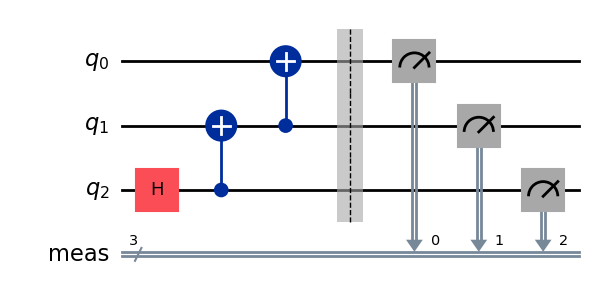

In [36]:
ghz.draw('mpl')

In [37]:
backend = aer_sv()

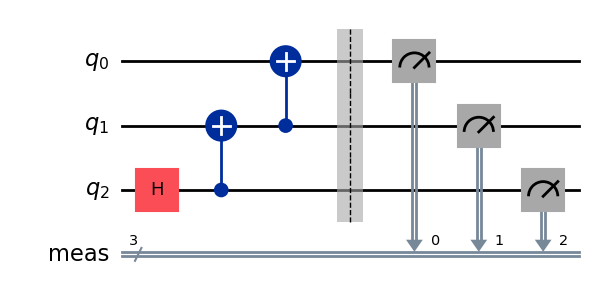

In [38]:
ghz_trans = transpile(ghz, backend, optimization_level=1)

ghz_trans.draw('mpl')


In [39]:
job = backend.run(ghz_trans, shots=8000)
result = job.result()
counts=result.get_counts()
print(counts)

{'111': 4013, '000': 3987}


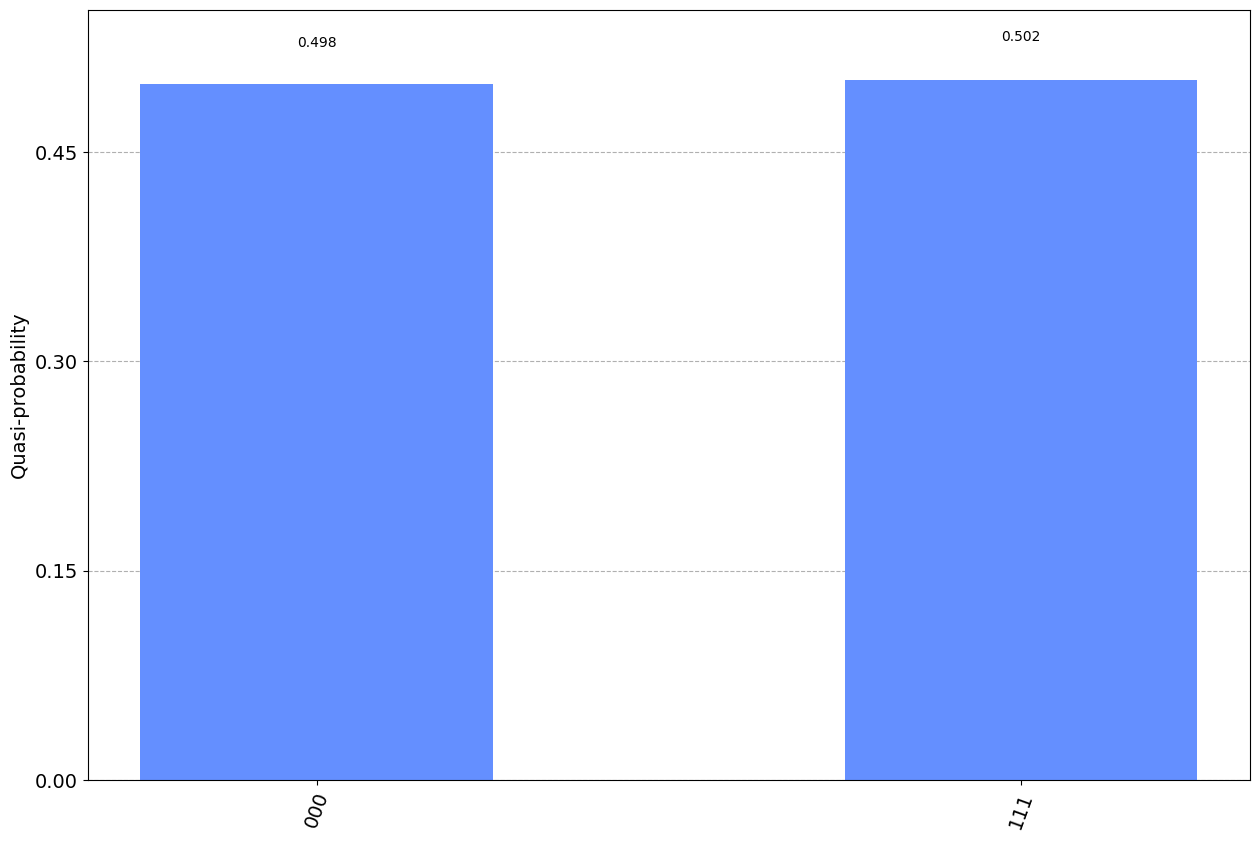

In [40]:
plot_distribution(counts, figsize=(15, 10))

In [41]:
# Defining Quantum Error Noise Model
# Depolarization Error
q1_gate_err = 0.01
q2_gate_err = 0.01

# Pauli Error
reset_error = 0.05
meas_error = 0.05
gate1_error = 0.01

qe_nm = qe_noise_model(q1_gate_err,q2_gate_err, reset_error, meas_error, gate1_error)


In [42]:
job = backend.run(ghz_trans, noise_model=qe_nm, shots=8000)
result = job.result()
counts=result.get_counts()
print("GHZ with Quantum Error Noise Model")
print(counts)

GHZ with Quantum Error Noise Model
{'100': 183, '110': 198, '001': 195, '011': 173, '111': 3373, '101': 181, '010': 183, '000': 3514}


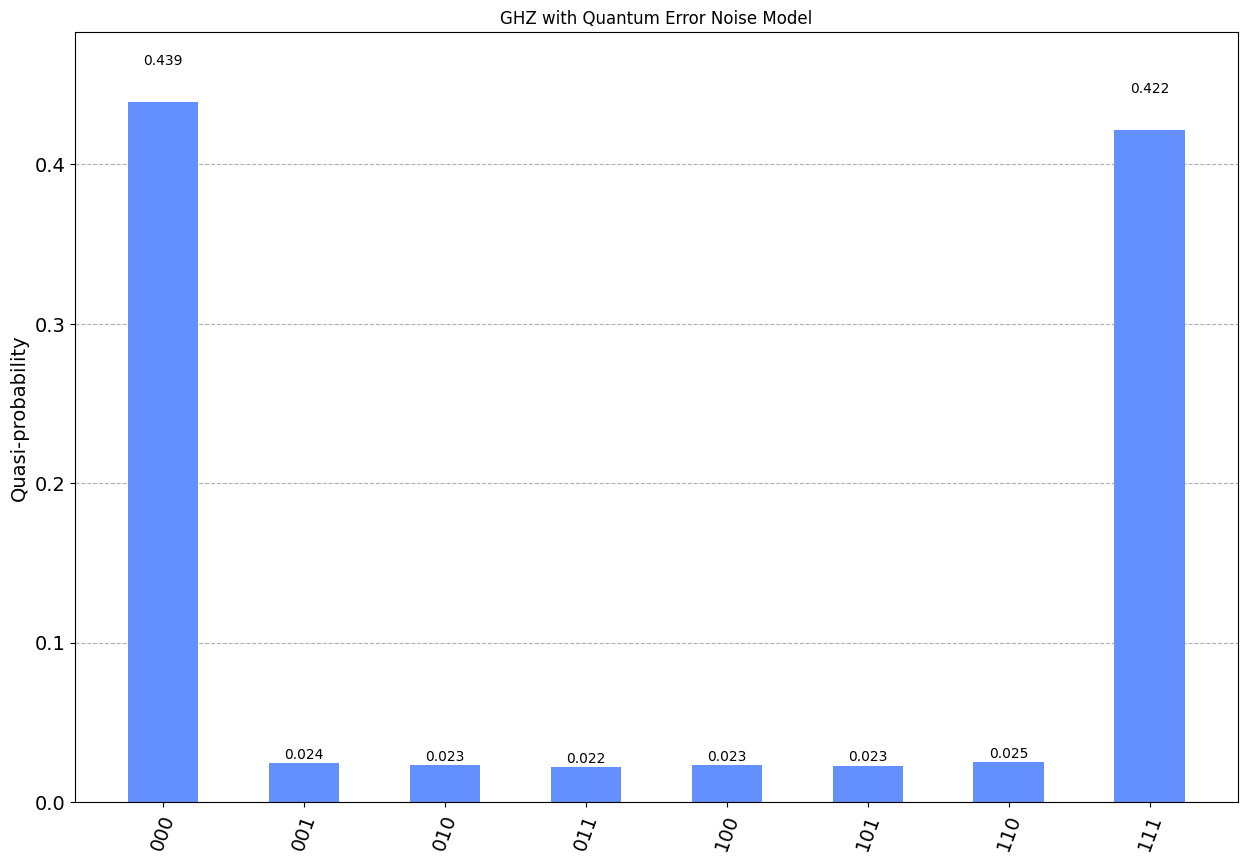

In [43]:
plot_distribution(counts, title="GHZ with Quantum Error Noise Model", figsize=(15, 10))

In [44]:
# Defining Thermal Noise Model
import numpy as np

# T1 and T2 values for qubits 0-3
T1s = np.random.normal(50e3, 10e3, num_qubits) # Sampled from normal distribution mean 50 microsec
T2s = np.random.normal(70e3, 10e3, num_qubits)  # Sampled from normal distribution mean 50 microsec

# Approximate instruction times (in nanoseconds) from QM data & discussion with Max
time_u1 = 0   # virtual gate
time_u2 = 16  # (single X90 pulse)
time_u3 = 32 # (two X90 pulses)
time_cx = 40
time_reset = 1216  # Feedback, measurement and conditional pulse
time_measure = 1000 # 1 microsecond

th_nm = th_noise_model(num_qubits, T1s, T2s, time_u1, time_u2, time_u3, time_cx, time_reset, time_measure)

In [45]:
job = backend.run(ghz_trans, noise_model=th_nm, shots=8000)
result = job.result()
counts=result.get_counts()
print("GHZ with Thermal Noise Model")
print(counts)

GHZ with Thermal Noise Model
{'111': 3818, '011': 80, '101': 45, '100': 3, '001': 2, '110': 88, '010': 1, '000': 3963}


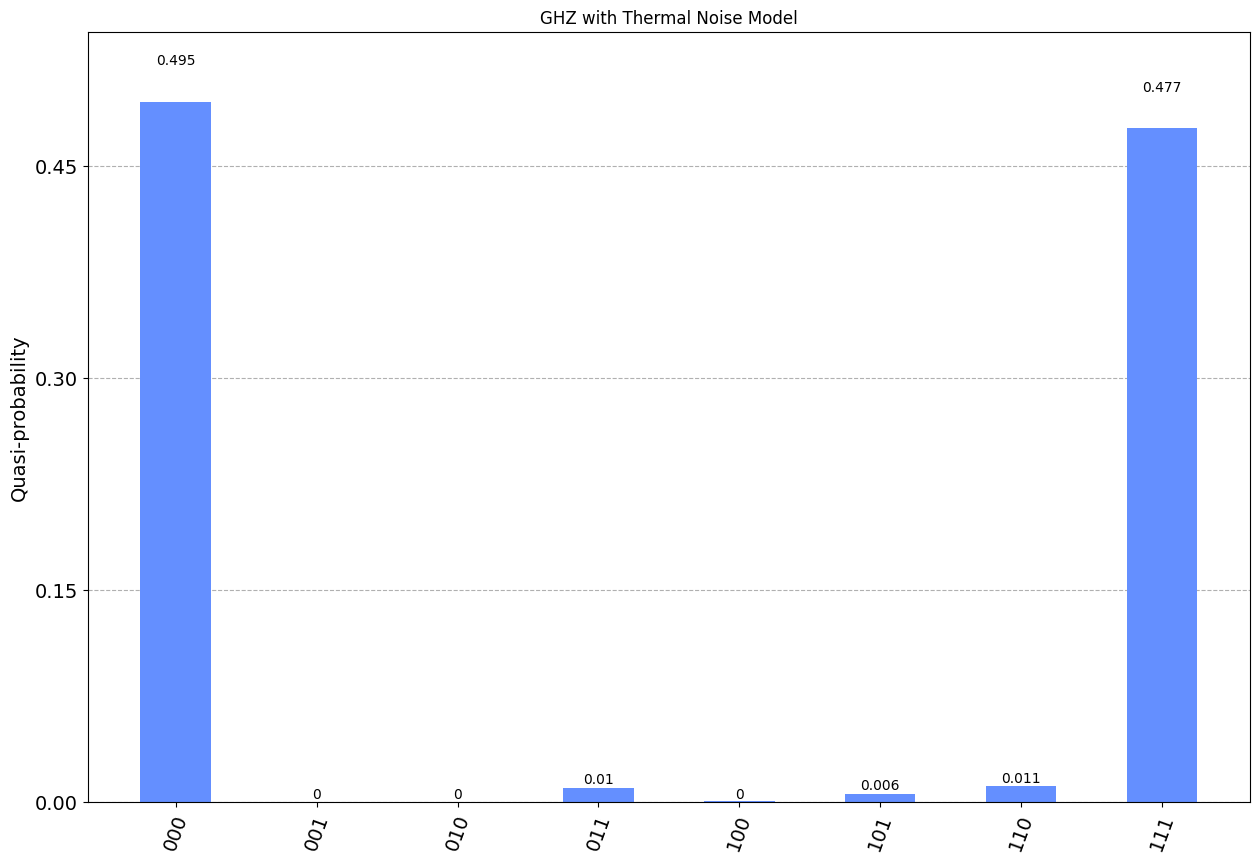

In [46]:
plot_distribution(counts, title="GHZ with Thermal Noise Model", figsize=(15, 10))

In [47]:
# Define Readout Noise Model
# Readout Error
p0given1 = 0.05
p1given0 = 0.05

ro_nm = ro_noise_model(p0given1,p1given0)

In [48]:
job = backend.run(ghz_trans, noise_model=ro_nm, shots=8000)
result = job.result()
counts=result.get_counts()
print("GHZ with Thermal Noise Model")
print(counts)

GHZ with Thermal Noise Model
{'110': 167, '001': 208, '100': 189, '101': 189, '010': 203, '000': 3436, '011': 187, '111': 3421}


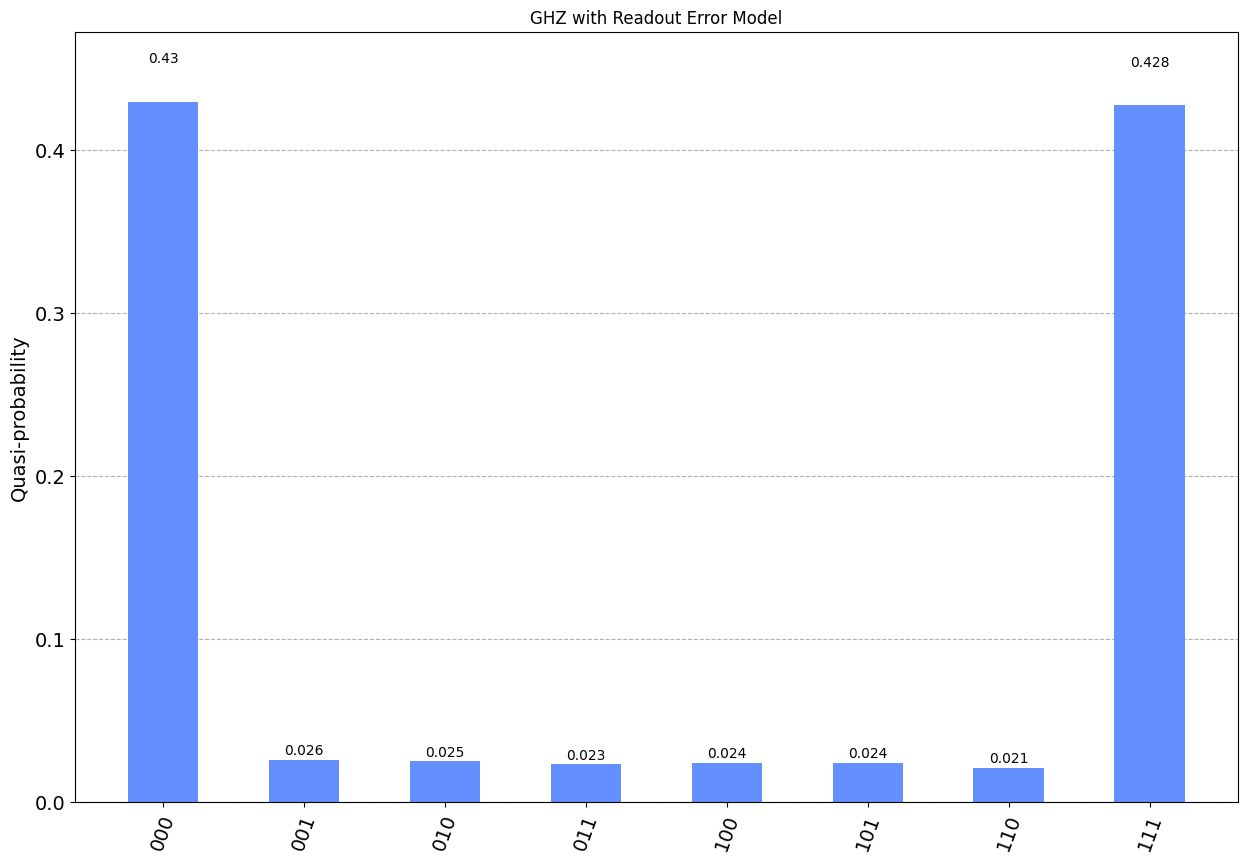

In [49]:
plot_distribution(counts, title="GHZ with Readout Error Model", figsize=(15, 10))

In [53]:
import qiskit
import qiskit_ibm_runtime
import qiskit_aer


qiskit_version = qiskit.version.get_version_info()
qiskit_ibm_runtime_version = qiskit_ibm_runtime.version.get_version_info()
qiskit_aer_version = qiskit_aer.version.get_version_info()

print (
    "Qiskit Version ", qiskit_version, "// ",
    "Qiskit IBM Runtime Version ", qiskit_ibm_runtime_version, "// ",
    "Qiskit Aer Simulator Version ", qiskit_aer_version 
)

Qiskit Version  1.0.2 //  Qiskit IBM Runtime Version  0.23.0 //  Qiskit Aer Simulator Version  0.14.0.1
